# Introduction au traitement de signal numérique

Ce présent notebook permet de s'initier à certains concepts importants du traitement de signal numérique. Pour plus de renseignement sur le traitement de signal numérique, un cours complet appliqué se trouve dans le Drive de Polycortex.

L'objectif de ce notebook est de retirer un bruit ajouté artificiellement à un signal. Vous pourrez utiliser diverses techniques pour y arriver.

## Installer les dépendances

Pour vous permettre d'analyser des signaux vous aurez besoin de librairies connues tel que numpy et scipy. Pour rappel, voici comment installer une librairie à l'aide du gestionnaire de paquets de python3:

> python3 -m pip install matplotlib numpy scipy

Vous pouvez taper cette commande dans un terminal pour tous les paquets qu'il vous manque.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

from scipy.io.wavfile import read
import scipy.signal
import scipy.fftpack

# Cela va permettre d'afficher des graphiques plus grands qui s'ajustent à la taille de ce notebook.
plt.rcParams['figure.figsize'] = [15, 5]

## Acquisition du signal sonore

Nous allons utiliser un signal audio dans le cadre de cet atelier. Pour ce faire, la première étape est de lire, puis ajouter tous les échantillons du fichier audio à un tableau. Il faut aussi connaître le taux d'échantillonage de notre signal. Le fichier à ouvrir se nomme `unidentified_sample.wav`.

In [4]:
# TODO

sample_wav = read("unidentified_sample.wav")
print(sample_wav)

frequency = sample_wav[0]
signal = sample_wav[1]

(32000, array([   0,    0,    0, ..., 2224, 1936, 1196], dtype=int16))


Nous pouvons calculer quelques informations importantes qui nous seront nécessaires dans le futur tel que la durée (en seconde) de notre échantillon et la période de celui-ci.

In [6]:
# TODO
period = 1/frequency
duration = period * len(signal)

print("Period is %f seconds and duration is %f seconds" % (period, duration))

Period is 0.000031 seconds and duration is 45.000000 seconds


Tout ceci est très intéressant, mais nous aimerions voir de quel est l'apparence du signal que nous utilisons. Nous aimerions donc afficher le graphique de l'amplitude de notre signal en fonction du temps. Pour ce faire, veuillez utiliser la librairie matplotlib.

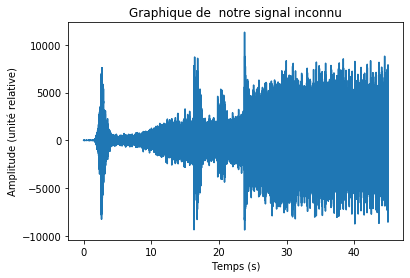

In [9]:
# TODO

# Nous avons besoin d'un axe du temps. Matplotlib demande un tableau pour l'axe des x.
# Il doit exister un x pour chq. y (cpt obvious...)
time = np.arange(0, duration, period)
plt.plot(time, signal)

# Ajoute des informations au graphique
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (unité relative)')
plt.title('Graphique de  notre signal inconnu')

plt.show()

Le graphique est magnifique! Mais nous voudrions surtout que toutes ces grandes oscillations rejoignent notre tympan. Veuillez jouer l'extrait audio. Peut-être allez-vous identifié quoi que ce soit.

In [10]:
# TODO

# Permet de jouer les échantillons qui sont stockés dans le tableau signal
ipd.Audio(signal, rate=frequency)

## Génération de bruit

En EEG, il s'agirait d'un signal parfait. Pour être un peu plus réaliste nous allons y ajouter un peu de bruit blanc généré à l'aide d'amplitudes ajouté de façon aléatoire sur nos échantillons.

In [13]:
# TODO: Ajouter du bruit au signal
NOISE_MAX_AMPLITUDE = 150

noise = NOISE_MAX_AMPLITUDE * np.random.randn(int(duration*frequency))
noisy_signal = signal + noise

Maintenant, on aimerait afficher ce signal bruité

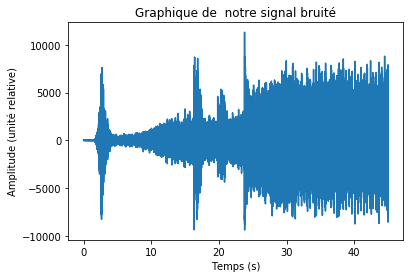

In [14]:
# TODO

plt.plot(time, noisy_signal)

# Ajoute des informations au graphique
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (unité relative)')
plt.title('Graphique de  notre signal bruité')

plt.show()

Celui-ci ressemble énormément au signal original. C'est normal, puisque nous voyons plus de 1,44 millions d'échantillons bruité d'une toute petite amplitude (relativement à l'échelle du graphique). Je vous propose donc de nous attarder à une plus petite quantité d'échantillons, afin d'avoir une meilleur vue de ce qui s'est passé. Nous allons comparer notre signal original avec ce signal bruité pour l'intervalle allant de 20 à 20.1 seconde.

*À noter que ce signal bruité ne sera pas le même pour tous, puisque nous avons généré un bruit aléatoire*

In [ ]:
# TODO

START_SAMPLE = int(20/period)
END_SAMPLE = int(20.01/period)

Finalement, nous allons écouté notre signal (audio) bruité.

In [ ]:
# TODO


## Retrait du bruit par le moyennage

Pour retirer ce bruit, nous pouvons utiliser la technique du moyennage de signal. Il s'agit d'une technique primitive de traitement de signal qui consiste à calculer la moyenne des 2K échantillons adjacents à notre t-ème échantillon de notre signal de taille N. Ce filtre peut-être représenté par la formule suivante:

$y_{t} = \frac{\sum_{i=t-k}^{t+k} x_{i}}{2k+1}$ où $y_{i}$ correspond au i-ème échantillon du signal filtré de taille N

Pour plus d'information à ce sujet, veuillez consulter la vidéo à ce propos dans le drive de Polycortex.

Après application de votre filtre, veuillez écouter le résultat.

In [ ]:
# TODO


On peut voir que nous avons quelque peut massacrer le signal malgré une réduction tout à fait raisonnable du bruit. Voyons voir l'apparence du signal filtré.

In [ ]:
# TODO


Nous pouvons regarder le graphique de notre signal bruité vs. notre signal filtré pour mieux comprendre ce qui s'est produit pour l'intervalle de 20 à 20.1 secondes.

In [ ]:
# TODO


N'hésitez pas à expérimenter avec plusieurs changement de la variable K pour voir ce qui se produit! **Veuillez discuter de cela en groupe.**

En général, avec le moyennage, il est difficile d'obtenir de bons résultats. Le signal obtenu perd de sa résolution et sa précision (voir netteté) une fois le filtre appliqué. Au final, ce filtre ne permet vraisemblablement que de moyenner des échantillons adjacents.

## Retrait du bruit par moyennage pondéré (par loi Normale)

Nous allons utilisée la loi normale centré en 0. Celle-ci va nous permettre de faire exactement la même chose que ce qui a été fait précédemment, mais en pondérant les échantillons. Notre échantillons original sera le plus considéré dans la pondération et plus les échantillons sont éloignés, plus il faudra diminuer leur importance. Nous pensons que cette façon de faire permettra de conserver un peu plus de netteté dans notre signal tout en diminuant le bruit (malgré une diminution de la qualité obligatoire).

$y_{t} = \sum_{i=t-k}^{t+k} x_{i}g_{i}$ où $y_{i}$ correspond au i-ème échantillon du signal filtré de taille N
, $x_{i}$ correspond aux échantillons adjancents le t-ème échantillon et $g_{i}$ correspond au gain de la fonction normale pour le point i
Pour plus d'informations à ce sujet, veuillez consulter la vidéo disponible dans le drive.

Dans notre cas, nous allons utilisé la formule suivante pour générer $g$:

$g(t) = e^\frac{-4 ln(2) t^2}{w^2}$

L'utilisation de $w$ correspond à la largeur de notre courbe à 50% du gain.

1. La première étape est de générer une fonction g qui sera utilisé pour filtrer notre signal.

In [ ]:
# TODO


2. La deuxième étape est d'appliquer cette fonction sur notre signal.

In [ ]:
# TODO


3. Nous voulons afficher le signal filtrer et le signal bruité pour voir ce que nous avons modifié sur ce dernier.

In [ ]:
# TODO


4. Faites jouer votre signal filtré!

In [ ]:
# TODO


Cette méthode ne donne pas nécessairement un meilleur signal filtré que la méthode précédente. N'hésitez pas à modifier les paramètres utilisés et discuter des résultats obtenus. 

On peut noter qu'il s'agit d'un problème corsé. Sans passer par des méthodes plus complexe tel que les ondelettes, il est vraiment difficile de réduire ce bruit.

## Conclusion

Heureusement, il existe des librairies qui implémente presque tout ce que nous venons de voir! Scipy fourni d'ailleurs énormément d'outils de signaux numérique. Pour la suite des choses, je vous suggère donc d'explorer les possibilités de cette librairie.

N'hésitez pas aussi à suivre le cours qui se retrouve dans le Drive de Polycortex et qui est disponible pour l'ensemble des membres. Il existe des méthodes vraiment efficaces pour résoudre ce genre de problème, mais un tantinet plus complexes.

Pour finir, le traitement de signal (et d'image) est un domaine énormément intéressant, rempli de potentiel et qui s'applique à presque tous les domaines (imagerie, statistique, traitement de données, finance, etc.). Il existe plusieurs cours qui sont donnés à Polytechnique à ce sujet.